In [96]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Estimating population proportion with confidence

In [6]:
t_val=1.96
n=659
x=540
p=x/n
se=np.sqrt(p*(1-p)/n)
ucl=p-t_val*se
lcl=p+t_val*se
(ucl,lcl)

(0.7900537499137914, 0.8487929875672404)

In [8]:
#using statsmodel
sm.stats.proportion_confint(x,n,alpha=0.05)

(0.7900542895874294, 0.8487924478936024)

# Estimating population mean with confidence

In [9]:
df=pd.read_csv('CartWheeldata.csv')

In [10]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [13]:
mean=df.CWDistance.mean()
t_val=2.064
n=df.shape[0]
se=df.CWDistance.std()/np.sqrt(n)

In [15]:
ucb,lcb=mean-t_val*se,mean+t_val*se
(ucb,lcb)

(76.26382957453707, 88.69617042546294)

In [18]:
#using statsmodels
sm.stats.DescrStatsW(df.CWDistance).zconfint_mean()

(76.57715593233024, 88.38284406766977)

# Estimating population proportion difference with confidence
is there difference in proportion of male and female smokers?

In [3]:
de=pd.read_csv('nhanes.csv')

In [7]:
pd.options.display.max_columns=None
de.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [10]:
de['SMQ020'].unique()

array([1, 2, 7, 9], dtype=int64)

In [12]:
de["SMQ020x"]=de['SMQ020'].replace({1:'Yes',2:'No',7:np.nan,9:np.nan})
de["SMQ020x"]

0       Yes
1       Yes
2       Yes
3        No
4        No
       ... 
5730    Yes
5731     No
5732    Yes
5733    Yes
5734     No
Name: SMQ020x, Length: 5735, dtype: object

In [13]:
de['RIAGENDR'].unique()

array([1, 2], dtype=int64)

In [16]:
de["RIAGENDRx"]=de['RIAGENDR'].replace({1:'Male',2:'Female'})
de["RIAGENDRx"]

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: RIAGENDRx, Length: 5735, dtype: object

In [17]:
dx=de[["RIAGENDRx","SMQ020x"]].dropna()

In [19]:
pd.crosstab(dx.RIAGENDRx,dx.SMQ020x)

SMQ020x,No,Yes
RIAGENDRx,,
Female,2066,906
Male,1340,1413


In [20]:
dx.head()

,RIAGENDRx,SMQ020x
0,Male,Yes
1,Male,Yes
2,Male,Yes
3,Female,No
4,Female,No


In [22]:
dx['SMQ020x']=dx['SMQ020x'].replace({'Yes':1,'No':0})
dx.head()

,RIAGENDRx,SMQ020x
0,Male,1
1,Male,1
2,Male,1
3,Female,0
4,Female,0


In [59]:
dx.groupby(['RIAGENDRx'])['SMQ020x'].count()

RIAGENDRx
Female    2972
Male      2753
Name: SMQ020x, dtype: int64

In [60]:
dx.groupby(['RIAGENDRx','SMQ020x'])['SMQ020x'].count()

RIAGENDRx  SMQ020x
Female     0          2066
           1           906
Male       0          1340
           1          1413
Name: SMQ020x, dtype: int64

In [56]:
dx.groupby(['RIAGENDRx'])['SMQ020x'].mean()

RIAGENDRx
Female    0.304845
Male      0.513258
Name: SMQ020x, dtype: float64

In [61]:
n1=2753
x1=1413
n2=2972
x2=906
p1=x1/n1
p2=x2/n2
t=1.96
se1=p1*(1-p1)/n1
se2=p2*(1-p2)/n2
p_diff=p1-p2
moe=t*np.sqrt(se1+se2)
lcb=p_diff-moe
ucb=p_diff+moe
(lcb,ucb)

(0.18346247413207697, 0.2333636091471941)

with 95% confidence we can say that the mean difference between male and female who smokesles between [0.1835 and 0.2334]

Text(0, 0.5, 'Female - male smoking proportion')

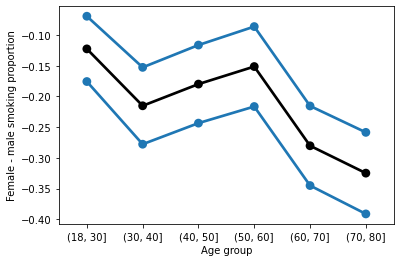

In [85]:
import seaborn as sns
# Calculate the smoking rates within age/gender groups
de["agegrp"] = pd.cut(de.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = de.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female", "Male"]

# The number of people for each calculated proportion
dn = de.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": np.size}).unstack()
dn.columns = ["Female", "Male"]

# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in smoking rates between genders
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

# Estimating population mean difference with confidence

In [64]:
de["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [79]:
de.groupby('RIAGENDRx')["BMXBMI"].agg(['mean','size','std'])

,mean,size,std
RIAGENDRx,,,
Female,29.939946,2976,7.753319
Male,28.778072,2759,6.252568


In [81]:
n1=2976
n2=2759
m1=29.939946
m2=28.778072
se1=7.753319/np.sqrt(n1)
se2=6.252568/np.sqrt(n2)
t=1.96
se=np.sqrt(se1**2+se2**2)
md=m1-m2
ucb=md+t*se
lcb=md-t*se
(lcb,ucb)

(0.798509725476467, 1.5252382745235278)

with 95% confidence level, the difference in means of male and female BMI lies between (0.798509725476467, 1.5252382745235278). Since 0 is not included in the range. We are 95% confident that is a +ve difference between the means.

Text(0, 0.5, 'Female - male BMI difference')

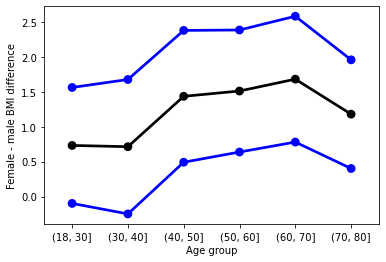

In [86]:
# Calculate the mean, SD, and sample size for BMI within age/gender groups
de["agegrp"] = pd.cut(de.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = de.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()

# Calculate the SEM for females and for males within each age band
pr["BMXBMI", "sem", "Female"] = pr["BMXBMI", "std", "Female"] / np.sqrt(pr["BMXBMI", "size", "Female"]) 
pr["BMXBMI", "sem", "Male"] = pr["BMXBMI", "std", "Male"] / np.sqrt(pr["BMXBMI", "size", "Male"]) 

# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
pr["BMXBMI", "mean_diff", ""] = pr["BMXBMI", "mean", "Female"] - pr["BMXBMI", "mean", "Male"]
pr["BMXBMI", "sem_diff", ""] = np.sqrt(pr["BMXBMI", "sem", "Female"]**2 + pr["BMXBMI", "sem", "Male"]**2) 
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff", ""] - 1.96 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + 1.96 * pr["BMXBMI", "sem_diff", ""] 

# Plot the mean difference in black and the confidence limits in blue
x = np.arange(pr.shape[0])
pp = sns.pointplot(x, pr["BMXBMI", "mean_diff", ""], color='black')
sns.pointplot(x, pr["BMXBMI", "lcb_diff", ""], color='blue')
sns.pointplot(x, pr["BMXBMI", "ucb_diff", ""], color='blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male BMI difference")

In [87]:
l1=['eat','sleep','fuck',('nice','boy')]

In [92]:
list(enumerate(l1))

[(0, 'eat'), (1, 'sleep'), (2, 'fuck'), (3, ('nice', 'boy'))]

In [94]:
dx = de.loc[de.RIAGENDRx=="Female", ["RIAGENDRx", "BMXBMI"]].dropna()

all_cis = []
for n in 100, 200, 400, 800:
    cis = []
    for i in range(500):
        dz = dx.sample(n)
        ci = sm.stats.DescrStatsW(dz.BMXBMI).zconfint_mean()
        cis.append(ci)
    
    cis = np.array(cis)
#     print(cis)
    mean_width = cis[:, 1].mean() - cis[:, 0].mean()
    print(n, mean_width)
    all_cis.append(cis)

100 3.0272360813349763
200 2.142458722992558
400 1.5221394074765868
800 1.0733095469192833


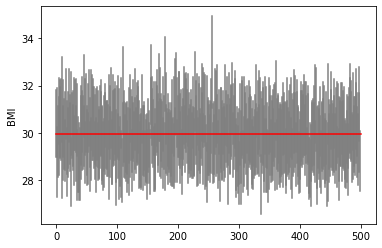

In [101]:
ci = all_cis[0]
for j, x in enumerate(ci):
    plt.plot([j, j], x, color='grey')
    plt.gca().set_ylabel("BMI")
mn = dx.BMXBMI.mean()
plt.plot([0, 500], [mn, mn], color='red')

In [98]:
print(np.mean(ci[:, 1] < mn)) # Upper limit falls below the target
print(np.mean(ci[:, 0] > mn)) # Lower limit falls above the target

0.024
0.014


# Hypothesis Testing

In [104]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist

## 1.One Population Proportion
### Research Question
In previous years 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media?

Population: Parents with a teenager (age 13-18)
Parameter of Interest: p
Null Hypothesis: p = 0.52
Alternative Hypthosis: p > 0.52 (note that this is a one-sided test)

1018 Parents

56% believe that their teenager’s lack of sleep is caused due to electronics and social media.

In [102]:
n = 1018
pnull = .52
phat = .56
sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

p value is less than significance level...  *Null hypothesis is Rejected.*

## 2.Difference in Population Proportions
### Research Question
Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

Populations: All parents of black children age 6-18 and all parents of Hispanic children age 6-18
Parameter of Interest: p1 - p2, where p1 = black and p2 = hispanic
Null Hypothesis: p1 - p2 = 0
Alternative Hypthosis: p1 - p2  ≠  = 0

91 out of 247 (36.8%) sampled parents of black children report that their child has had some swimming lessons.

120 out of 308 (38.9%) sampled parents of Hispanic children report that their child has had some swimming lessons.

In [108]:
# This example implements the analysis from the "Difference in Two Proportions" lecture videos

# Sample sizes
n1 = 247
n2 = 308

# Number of parents reporting that their child had some swimming lessons
y1 = 91
y2 = 120

# Estimates of the population proportions
p1 = round(y1 / n1, 2)
p2 = round(y2 / n2, 2)

# Estimate of the combined population proportion
phat = (y1 + y2) / (n1 + n2)

# Estimate of the variance of the combined population proportion
va = phat * (1 - phat)

# Estimate of the standard error of the combined population proportion
se = np.sqrt(va * (1 / n1 + 1 / n2))

# Test statistic and its p-value
test_stat = (p1 - p2) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

# Print the test statistic its p-value
print("Test Statistic")
print(round(test_stat, 2))

print("\nP-Value")
print(round(pvalue, 2))

Test Statistic
-0.48

P-Value
0.63


## 3.One Population Mean
### Research Question
Is the average cartwheel distance (in inches) for adults more than 80 inches?

Population: All adults
Parameter of Interest:  μ , population mean cartwheel distance. Null Hypothesis:  μ  = 80 Alternative Hypthosis:  μ  > 80

25 Adults

μ=82.46 
σ=15.06

In [109]:
df=pd.read_csv('Cartwheeldata.csv')
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [111]:
n=df.shape[0]
mean=df.CWDistance.mean()
sd=df.CWDistance.std()
(n, mean, sd)

(25, 82.48, 15.058552387264852)

In [116]:
sm.stats.ztest(df.CWDistance,value=80, alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

*Can't Reject Null Hypothesis*

## 4.Difference in Population Means
### Research Question
Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

Population: Adults in the NHANES data.
Parameter of Interest:  μ1−μ2 , Body Mass Index.
Null Hypothesis:  μ1=μ2 
Alternative Hypthosis:  μ1≠μ2 
2976 Females  μ1=29.94 
σ1=7.75 

2759 Male Adults
μ2=28.78 
σ2=6.25 

μ1−μ2=1.16

In [119]:
url = "nhanes.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [120]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [121]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.93994565217392, 7.753318809545674)

In [122]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846942, 6.2525676168014614)

In [123]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna())

(6.1755933531383205, 6.591544431126401e-10)

Reject the Null Hypothesis as p is very very less than significance level